## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.

In [113]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset

In this homework, we continue using the fuel efficiency dataset.
Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [114]:
data='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

!wget $data

--2025-11-11 07:13:54--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.007s  

2025-11-11 07:13:54 (115 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]

Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[==

In [115]:
!head CreditScoring.csv

head: cannot open 'CreditScoring.csv' for reading: No such file or directory


In [116]:
df = pd.read_csv(data)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Preparation:

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [118]:
# Fill missing values with zeros
df = df.fillna(0)

# Split into train/val/test (60/20/20)
df_full_train, df_temp = train_test_split(df, test_size=0.4, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

y_full_train = df_full_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_full_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Convert to dicts for DictVectorizer
dv = DictVectorizer(sparse=True)
train_dicts = df_full_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

## Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?


* `'vehicle_weight'`
* `'model_year'`
* `'origin'`
* `'fuel_type'`

Feature used for splitting: vehicle_weight


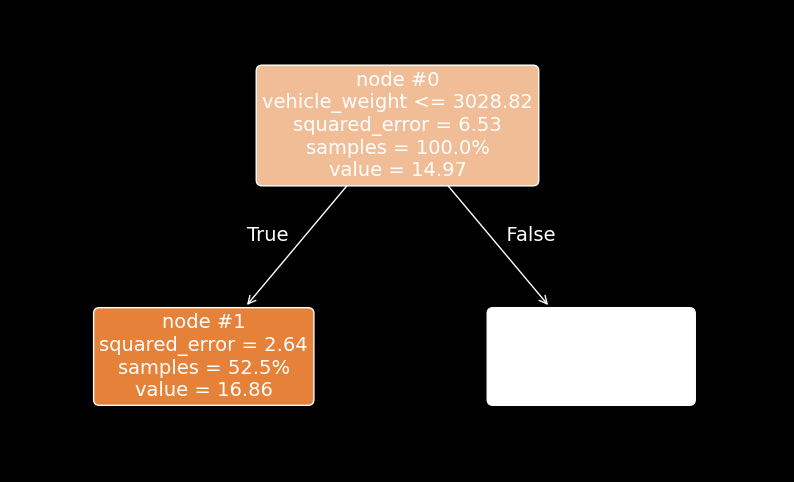

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Train Decision Tree Regressor with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_full_train, y_full_train)

# Get the feature used for the first split
feature_names = dv.get_feature_names_out()
split_feature_idx = dt.tree_.feature[0]
split_feature = feature_names[split_feature_idx]
print('Feature used for splitting:', split_feature)

# Visualize the tree with custom colors
fig, ax = plt.subplots(figsize=(10,6))
tree.plot_tree(dt, feature_names=feature_names, filled=True,
                rounded=True,
                fontsize=14,
                node_ids=True,
                proportion=True,
                impurity=True,
                precision=2,
                ax=ax)
plt.gcf().set_facecolor('black')
plt.show()

> 'vehicle_weight'

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 0.045
* 0.45
* 4.5
* 45.0

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_full_train, y_full_train)

# Predict on validation set
y_pred = rf.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE:', rmse)

RMSE: 0.4602815367032659


> 0.45 {0.4602815367032658}

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in
your answer.

In [ ]:
rmse_values = []
n_estimators_list = list(range(10, 201, 10))
for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_full_train, y_full_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)
    print(f'n_estimators: {n}, RMSE: {rmse:.3f}')
plt.plot(n_estimators_list, rmse_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)
plt.show()
# Find the value after which RMSE stops improving (to 3 decimals)
rmse_rounded = [round(r, 3) for r in rmse_values]
for i in range(1, len(rmse_rounded)):
    if rmse_rounded[i] == rmse_rounded[i-1]:
        print(f'RMSE stops improving after n_estimators = {n_estimators_list[i]}')
        break
else:
    print(f'RMSE keeps improving up to n_estimators = {n_estimators_list[-1]}')

> 80 {90{70}}

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [ ]:
max_depth_values = [10, 15, 20, 25]
n_estimators_list = list(range(10, 201, 10))
mean_rmse_per_depth = {}
for max_depth in max_depth_values:
    rmse_values = []
    for n in n_estimators_list:
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_full_train, y_full_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_values.append(rmse)
    mean_rmse = np.mean(rmse_values)
    mean_rmse_per_depth[max_depth] = mean_rmse
    print(f'max_depth: {max_depth}, mean RMSE: {mean_rmse:.4f}')
best_depth = min(mean_rmse_per_depth, key=mean_rmse_per_depth.get)
print(f'Best max_depth: {best_depth} (mean RMSE: {mean_rmse_per_depth[best_depth]:.4f})')

> 10

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `vehicle_weight`
*	`horsepower`
* `acceleration`
* `engine_displacement`	

In [123]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_full_train, y_full_train)
importances = rf.feature_importances_
feature_names = dv.get_feature_names_out()
feature_importance_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print('Most impotant features:', sorted_features[0][0])
print('Feature importance:')
for name, score in sorted_features:
    print(f'{name}: {score:.4f}')

Most impotant features: vehicle_weight
Feature importance:
vehicle_weight: 0.9599
horsepower: 0.0159
acceleration: 0.0114
engine_displacement: 0.0032
model_year: 0.0031
num_cylinders: 0.0023
num_doors: 0.0016
origin=USA: 0.0005
origin=Asia: 0.0004
origin=Europe: 0.0004
fuel_type=Diesel: 0.0003
drivetrain=All-wheel drive: 0.0003
fuel_type=Gasoline: 0.0003
drivetrain=Front-wheel drive: 0.0003


> vehicle_weight

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [124]:
import xgboost as xgb

In [125]:
# Prepare DMatrix for train and validation
dtrain = xgb.DMatrix(X_full_train, label=y_full_train)
dval = xgb.DMatrix(X_val, label=y_val)
watchlist = [(dtrain, 'train'), (dval, 'val')]

def train_xgb(eta):
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=False)
    y_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

rmse_03 = train_xgb(0.3)
rmse_01 = train_xgb(0.1)
print(f'RMSE (eta=0.3): {rmse_03:.4f}')
print(f'RMSE (eta=0.1): {rmse_01:.4f}')
if rmse_03 < rmse_01:
    print('eta=0.3 gives the best RMSE')
elif rmse_01 < rmse_03:
    print('eta=0.1 gives the best RMSE')
else:
    print('Both give equal value')

RMSE (eta=0.3): 0.4434
RMSE (eta=0.1): 0.4167
eta=0.1 gives the best RMSE


> 0.1

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw06
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.